# Creando visualizaciones usando matplotlib, Seaborn y Folium.


In [1]:
# importando librerias
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Descripcion de datos

El conjunto de datos utilizado para esta tarea de visualización contiene datos **historical_automobile_sales** que representan las ventas de automóviles y variables relacionadas durante el período de recesión y sin recesión.

The dataset includes the following variables:
1. **Date**: La fecha de la observación.
2. **Recession**: Una variable binaria que indica un período de recesión; 1 significa que fue recesión, 0 significa que fue normal.
3. **Automobile_Sales**: El numero de vehículos vendidos durante el periodo.
4. **GDP**: El valor del PIB per cápita en USD
5. **Unemployment_Rate**: La tasa de desempleo mensual..
6. **Consumer_Confidence**: Un índice sintético que representa la confianza del consumidor, que puede afectar el gasto de los consumidores y las compras de automóviles.
7. **Seasonality_Weight**: El peso que representa el efecto de estacionalidad en las ventas de automóviles durante el período.
8. **Price**: El precio medio del vehículo durante el período.
9. **Advertising_Expenditure**: El gasto publicitario de la empresa.
10.**Vehicle_Type**: El tipo de vehículos vendidos; Superminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
11.**Competition**: La medida de competencia en el mercado, como el número de competidores o la participación de mercado de los principales fabricantes.
12.**Month**: Mes de la observación extraída de Fecha.
13.**Year**: Año de la observación extraído de Fecha.

Al examinar varios factores mencionados anteriormente en el conjunto de datos, su objetivo es obtener información sobre cómo las recesiones afectaron las ventas de automóviles de su empresa.



---



## Importando datos


In [2]:
# importando datos para jupyter lite
'''
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')
'''

'\nfrom js import fetch\nimport io\n\nURL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"\nresp = await fetch(URL)\ntext = io.BytesIO((await resp.arrayBuffer()).to_py())\nimport pandas as pd\ndf = pd.read_csv(text)\nprint(\'Data downloaded and read into a dataframe!\')\n'

In [3]:
# importando datos
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)
print('Bien hecho!')

Bien hecho!


In [4]:
# mostrando las primeras filas
df.head(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
# mostrando la forma del dataframe filas x columnas
df.shape

(528, 15)

In [6]:
#mostrando la descripcion  estadistica del dataframe
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [7]:
# Mostrando el nombre de las columnas
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')



---



## Crando visualizaciones para el analisis de datos

### Tarea 1. Line plot
Desarrolle un line chart utilizando la funcionalidad de pandas para mostrar cómo las ventas de automóviles fluctúan de un año a otro.<br>
**tip**: Para agrupar el año y calcular el promedio en la columna 'Automobile_Sales', ya que los datos tienen la columna de años y meses hacer uso de `plot()` con `kind = 'line'`
No olvides incluir etiquetas y título.

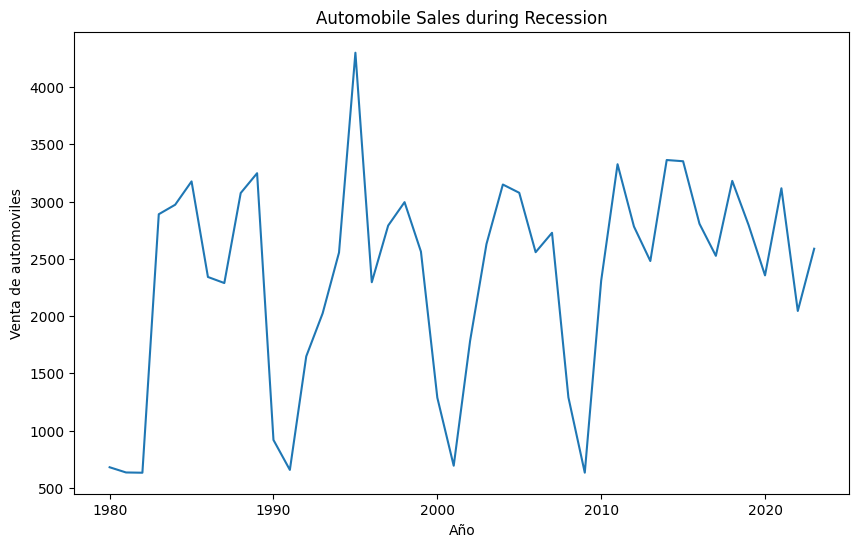

In [8]:
# creando el grafico line chart
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

#create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Año')
plt.ylabel('Venta de automoviles')
plt.title('Automobile Sales during Recession')
plt.show()

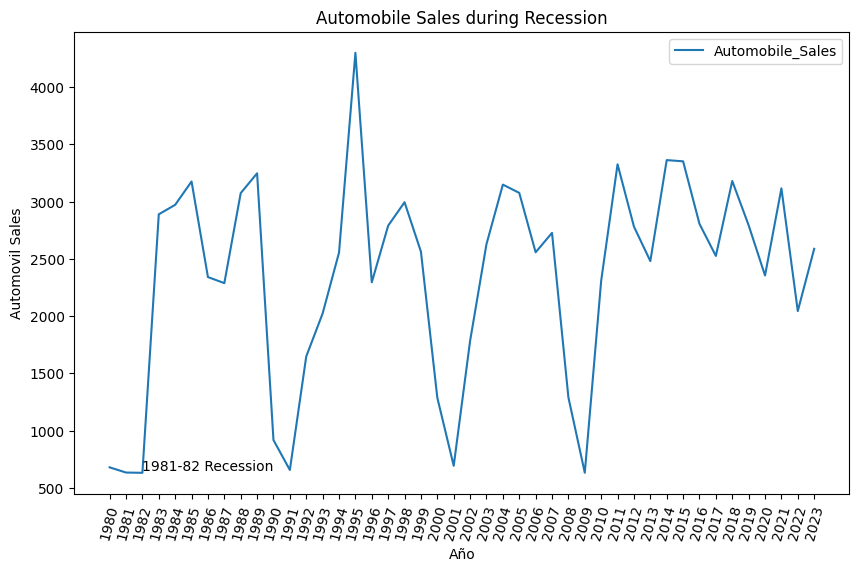

In [9]:
# Mejorando la figura anterior
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Año')
plt.ylabel('Automovil Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
#plt.text(......, ..., '..............')
plt.legend()
plt.show()

### Tarea 1.2: Line plot 2
Trace diferentes líneas para categorías de tipo de vehículo y analice la tendencia para responder a la pregunta<br>
¿Existe una diferencia notable en las tendencias de ventas entre diferentes tipos de vehículos durante los períodos de recesión?<br>
**tip:**


* Cree un dataframe separado donde la recesión de la columna tenga un valor de '1'
* para agrupar el año, tipo_vehículo y calcular el promedio en las 'Ventas de automóviles'
una manera es:
* Use as_index como falso, de lo contrario terminará con una fama de datos indexada múltiple
* luego establece el año como índice y grupo por vehículo sobre Ventas y gráfico
* haga uso de `.plot()` con `kind = 'line'`
* no olvides incluir etiquetas y título.





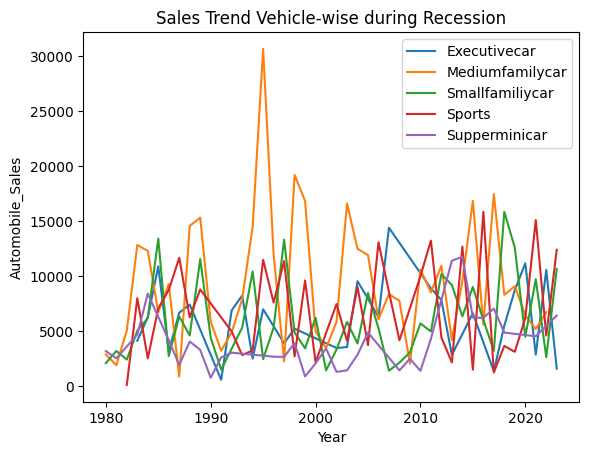

In [10]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile_Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

A partir del gráfico anterior, ¿qué información ha obtenido sobre las ventas de varios tipos de vehículos?<br> Escriba su respuesta a continuación:<br>
A partir de este gráfico, podemos entender que durante el período de recesión, las ventas de 'vehículos deportivos' disminuyeron debido al alto costo del vehículo.
mientras que las ventas del superminicar y del pequeño familiar aumentaron.

### Tarea 3. Bar Chart
Utilice la funcionalidad de **Seaborn Library** para crear una visualización que compare la tendencia de ventas por tipo de vehículo durante un período de recesión con un período sin recesión.

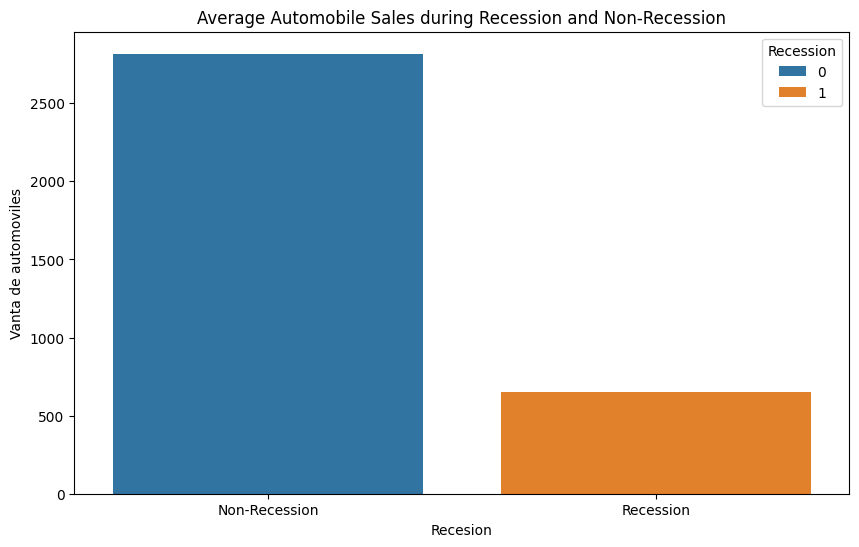

In [11]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Creando el grafico de barras usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recesion')
plt.ylabel('Vanta de automoviles')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

Ahora desea comparar las ventas de diferentes tipos de vehículos durante un período de recesión y sin recesión.<br>

Para visualizar las ventas de diferentes vehículos durante los períodos de recesión y sin recesión, puede utilizar un gráfico de barras.<br>
Deberá agrupar Recesión, Tipo_de_vehículo para las Ventas_de_automóviles promedio y luego trazarlo
Utilice: `sns.barplot(x=x,y=y, data = df)`

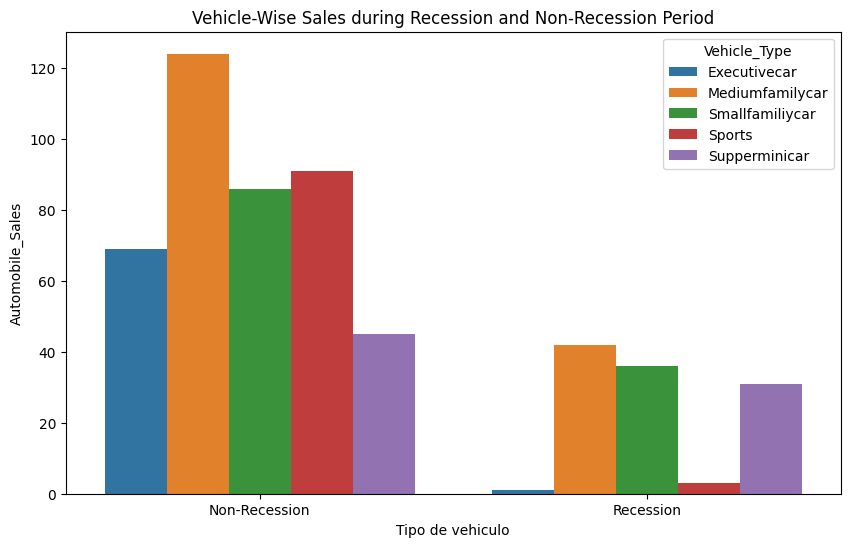

In [31]:
# Filtrar los datos por periodos recesivos
#recession_data = df[['Recession']]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].count().reset_index()

# Calcule el volumen total de ventas por tipo de vehículo durante las recesiones
#sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Creando una agrupacion con barchar usando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales',hue='Vehicle_Type', data=dd) # ,
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Tipo de vehiculo')
plt.ylabel('Automobile_Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

A partir del gráfico anterior, ¿qué información ha obtenido sobre las ventas generales de automóviles durante la recesión? <br> Escriba su respuesta a continuación:

A partir de este gráfico, podemos entender que hay una caída drástica en las ventas generales de automóviles durante la recesión.
Sin embargo, el tipo de vehículo más afectado es el ejecutivo y el deportivo.

## Tarea 1.4. Subplot
Utilice subgráficos para comparar las variaciones del PIB durante el período de recesión y sin recesión desarrollando gráficos de líneas para cada período.<br>
Ahora desea obtener más información a partir de los datos para comprender el motivo. <br>Traza un gráfico de dos líneas usando subtrazado para responder:
¿Cómo varió el PIB a lo largo del tiempo durante los períodos de recesión y sin recesión?
<br>Utilice <code>add_subplot()</code>> de Matplotlib para esta comparación

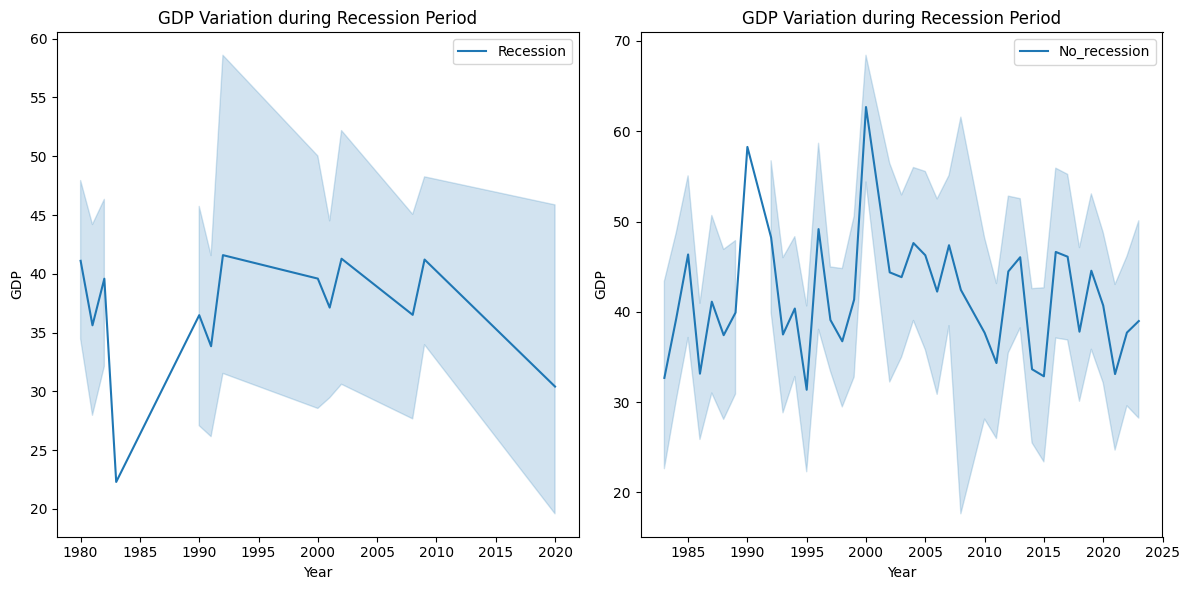

In [ ]:
# solucion. forma 1
#Crear un dataframe para períodos de recesión y no recesión
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Crea diferentes ejes para subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot).

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='No_recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Recession Period')

plt.tight_layout()
plt.show()

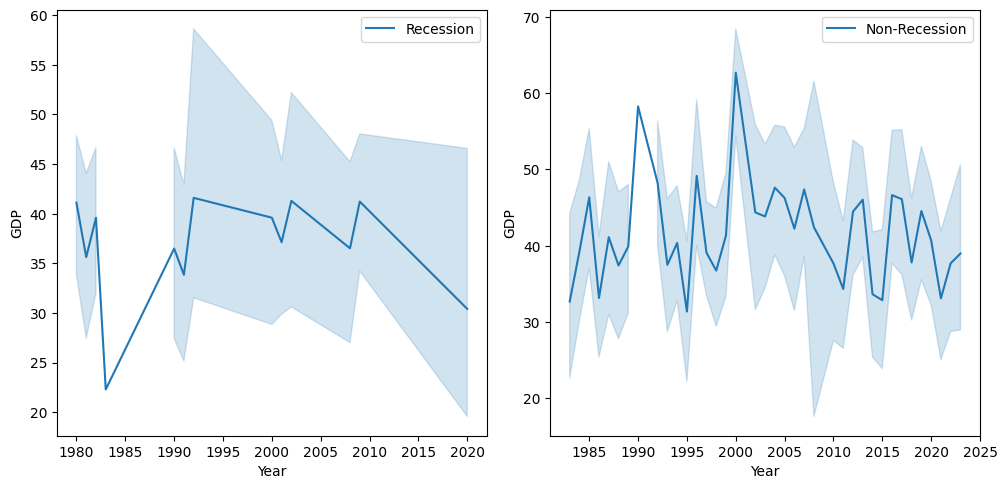

In [ ]:
# solucion. forma 2
#Crear un dataframe para períodos de recesión y no recesión
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Using subplot()
plt.figure(figsize=(10, 5))

#subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

#subplot 1
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

plt.tight_layout()
plt.show()

**Inferencia** A partir de este gráfico, es evidente que durante la recesión, el PIB del país estaba en un rango bajo, lo que podría haber afectado las ventas generales de la empresa.

## Tarea 1.5. Bubble Plot
Desarrolle un diagrama de burbujas para mostrar el impacto de la estacionalidad en las ventas de automóviles.
<br>¿Cómo ha impactado la estacionalidad en las ventas, en qué meses las ventas fueron altas o bajas? Compruébelo para conocer los años sin recesión para comprender la tendencia.<br>

Desarrolle un gráfico de burbujas para mostrar las ventas de automóviles de cada mes y utilice el peso de estacionalidad para representar el tamaño de cada burbuja<br>

Titula este gráfico como "Impacto de la estacionalidad en las ventas de automóviles".

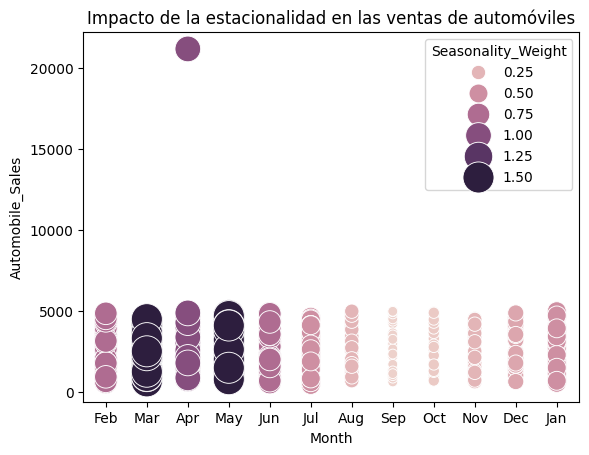

In [54]:
# formando el grafico
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', hue='Seasonality_Weight', legend=True,size=size, sizes=(50,500))

#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Impacto de la estacionalidad en las ventas de automóviles')

plt.show()

**inferencia:** De este gráfico se desprende que la estacionalidad no ha afectado las ventas totales. Sin embargo, se produce un drástico aumento de las ventas en el mes de abril.




---



## Tarea 1.6. Scatter Plot
Utilice la funcionalidad de Matplotlib para desarrollar un diagrama de dispersión para identificar la correlación entre el precio promedio del vehículo y el volumen de ventas durante las recesiones.<br>
A partir de los datos, desarrolle un diagrama de dispersión para identificar si existe una correlación entre la confianza del consumidor y las ventas de automóviles durante el período de recesión.
<br> Titula este gráfico como: 'Confianza del consumidor y ventas de automóviles durante las recesiones

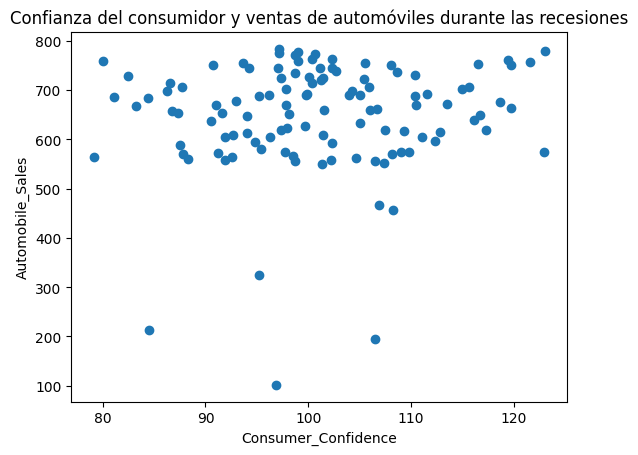

In [ ]:
# Graficando
#Crea un  dataframe para al el periodo de recession y de non-recession
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Confianza del consumidor y ventas de automóviles durante las recesiones')
plt.show()

¿Cómo se relaciona el precio promedio de un vehículo con el volumen de ventas durante las recesiones?
<br> Trace otro diagrama de dispersión y titúlelo:<br>
'Relación entre el precio promedio de los vehículos y las ventas durante las recesiones'

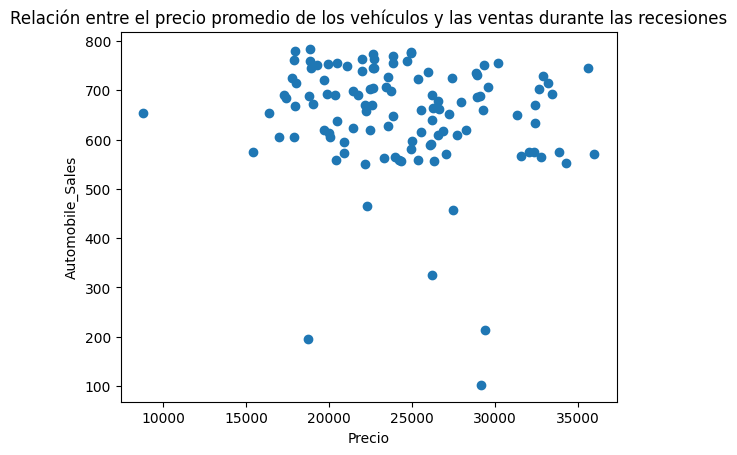

In [ ]:
#Grafico 2
#Creando  un dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Precio')
plt.ylabel('Automobile_Sales')
plt.title('Relación entre el precio promedio de los vehículos y las ventas durante las recesiones')
plt.show()

**Inferencia**
There is not much relation!



---



## Tarea 1.7. Plot pie
Cree un gráfico circular para mostrar la parte del gasto publicitario de XYZAutomotives durante los períodos de recesión y sin recesión.<br>
¿Cómo cambió el gasto en publicidad de XYZAutomotives durante los períodos de recesión y sin recesión?

**tip:** Puede crear dos dtaframe para el período de recesión y no recesión.
* Calcule la suma de Advertising_Expenditure para ambos dataframes
* Pase estos valores totales a plt.pie(). Puede incluir etiquetas como ['Recesión', 'No recesión']
Siéntete libre de personalizar aún más el pastel.
* titule este gráfico como: Gasto en publicidad durante los períodos de recesión y sin recesión

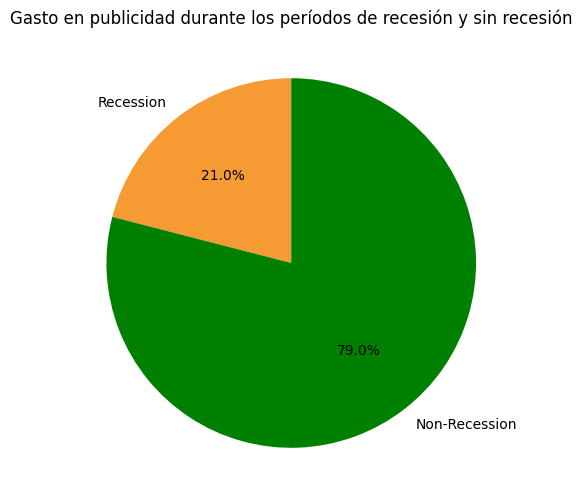

In [ ]:
# Grafico de pastel

# Filtrado de datos
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calcule el gasto publicitario total para ambos períodos.
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

colores = ['#F69A33', 'green']

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colores)

plt.title('Gasto en publicidad durante los períodos de recesión y sin recesión')
plt.show()

A partir del gráfico anterior,<br> ¿qué información encuentra sobre el gasto en publicidad durante los períodos de recesión y sin recesión?<br>
Parece que ABCAutomotives ha estado gastando mucho más en publicidad durante los períodos sin recesión que durante los tiempos de recesión.




---



## Tarea 1.8. Pie_Plot 2
Desarrolle un gráfico circular para mostrar el gasto total en publicidad para cada tipo de vehículo durante el período de recesión.<br>
¿Podemos observar la participación de cada tipo de vehículo en el gasto total durante las recesiones?<br>
**Tip:**
* Se le pedirá que agrupe el tipo de vehículo para la suma de los gastos de publicidad.
* la gráfica es un pastel con los datos, puede incluir etiquetas relevantes
* titule este gráfico como: Participación de cada tipo de vehículo en el gasto total durante las recesiones





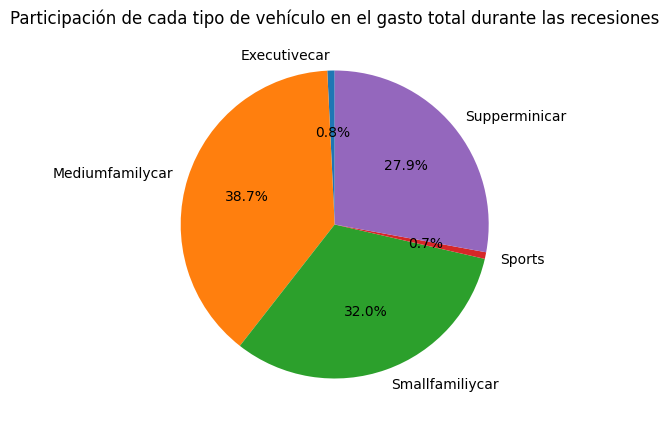

In [ ]:
# graficando e pie chart
# Filtrado de datos
Rdata = df[df['Recession'] == 1]

# Calcula el volumen de ventas por el tipo de vehiculo durante la recesion
VTexpenditure = Rdata.groupby('Vehicle_Type')['Automobile_Sales'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 5))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Participación de cada tipo de vehículo en el gasto total durante las recesiones')

plt.show()

**Inferencia**<br>
Durante la recesión, la publicidad se centraba principalmente en vehículos de gama baja. ¡Una sabia decisión!



---



## Tarea 1.9. line plot_3
Desarrolle un gráfico lineal para analizar el efecto de la tasa de desempleo sobre el tipo de vehículos y las ventas durante el período de recesión.<br>
Analizar el efecto de la tasa de desempleo sobre el tipo de vehículos y las ventas durante el período de recesión.<br>
Puede crear un diagrama de líneas y titularlo como: **Efecto de la tasa de desempleo en el tipo de vehículo y las ventas**.<br>

**tip: ** Filtrar los datos para el período de recesión.
Utilice <code>lineplot()</code> de seaborn y pase los datos relevantes

<ipython-input-62-bc9e31589aa5>:4: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


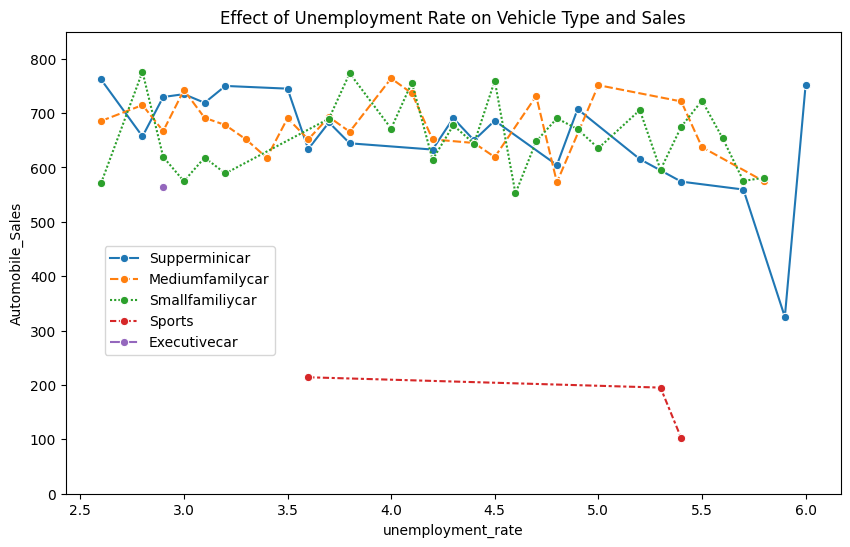

In [62]:
# grafico de linea plot
df_rec = df[df['Recession']==1]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.show()



A partir del gráfico anterior.<br>¿Qué información ha obtenido sobre las ventas de superminicar, smallfamilycar y mediumminicar?<br>
Durante la recesión, el patrón de compra cambió y las ventas de vehículos de gama baja como superminicar, Smallfamilycar y Mediumminicar.



---



## Opcional Tarea 1.10.
Crear un mapa de la región/oficinas de mayores ventas de la empresa durante el período de recesión.


In [ ]:
# para jupyter lite

'''
  from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

'''

'\n  from pyodide.http import pyfetch\n\nasync def download(url, filename):\n    response = await pyfetch(url)\n    if response.status == 200:\n        with open(filename, "wb") as f:\n            f.write(await response.bytes())\n\npath = \'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json\'\nawait download(path, "us-states.json")\n\nfilename = "us-states.json"\n\n'

In [ ]:
# Importamos la librería 'urllib'
from urllib.request import urlopen

# importamos json
import json

# definimos la url de json
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

#almacenamos la respuesta de la url
datos = urlopen(path)

#almacenamos los datos obtenidos
datosjson = json.loads(datos.read())

## Le cambio a comillas dobles
us_states = json.dumps(datosjson)

print(us_states.json)

AttributeError: 'str' object has no attribute 'json'

Descubrió que el conjunto de datos también contiene la ubicación/ciudad de las oficinas de la empresa. Ahora desea mostrar el impacto de la recesión en varias oficinas/ventas de la ciudad mediante el desarrollo de una coropleta.

In [ ]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
      geo_data= 'us_states.json',  # GeoJSON file with state boundaries
      data=sales_by_city,
      columns=['City', 'Automobile_Sales'],
      key_on='feature.properties.name',
      fill_color='YlOrRd',
      fill_opacity=0.7,
      line_opacity=0.2,
      legend_name='Automobile Sales during Recession'
  ).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
  )

# Display the map
map1

FileNotFoundError: [Errno 2] No such file or directory: 'us_states.json'